In [1]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from sklearn.utils import shuffle
from tqdm import tqdm

2023-09-03 22:08:05.192428: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-03 22:08:05.865445: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D, Input, concatenate, Conv2D, Activation, ZeroPadding2D, UpSampling2D, add
from tensorflow.keras.models import *
from qkeras import *

import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import load_img

import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle
from tqdm import tqdm

In [3]:
import cv2

In [4]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [5]:
PRETRAINED = True
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 0


2023-09-03 22:08:07.889169: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-09-03 22:08:07.889231: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: cmsgpu01.hep.wisc.edu
2023-09-03 22:08:07.889245: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: cmsgpu01.hep.wisc.edu
2023-09-03 22:08:07.889359: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 530.30.2
2023-09-03 22:08:07.889431: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 530.30.2
2023-09-03 22:08:07.889444: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 530.30.2


In [6]:
xdata = np.load("/nfs_scratch/hsharma/MachineLearning/ClusterFinder/data/crystal_array.npy")
xdata = np.expand_dims(xdata, axis=1)
xdata.shape

(86940, 1, 10, 10)

In [7]:
ydata = np.load("/nfs_scratch/hsharma/MachineLearning/ClusterFinder/data/cluster_array.npy")
ydata = np.expand_dims(ydata, axis=1)
ydata.shape

(86940, 1, 10, 10)

In [8]:
data = np.hstack([xdata, ydata])
data.shape

(86940, 2, 10, 10)

In [9]:
empty_examples = np.where(np.sum(data, axis=(1,2,3))==0.0)[0]
#drop_list  = np.random.choice(empty_examples, size=empty_examples.shape[0])
drop_list = empty_examples
data = np.delete(data, drop_list, axis=0)
#data = np.expand_dims(data, axis=-1)
data.shape

(39051, 2, 10, 10)

In [10]:
#data = np.load("/nfs_scratch/hsharma/MachineLearning/ClusterFinder/data/EMData-validation.npy")
#data = np.pad(data, ((0,0), (0,0), (3, 4), (1, 1)), 'constant')

### Cluster Energy Repr Test

In [11]:
data.shape

(39051, 2, 10, 10)

In [12]:
# test where energy exists in cluster algo and not in energy map
filtered_set = set()

for i in range(len(data)):
    test_point = data[i]
    energies_at_clusters = test_point[0][test_point[1]!=0]
    if 0 in energies_at_clusters:
        filtered_set.add(i)

In [13]:
print(len(filtered_set))
filtered_set

201


{169,
 366,
 555,
 1185,
 1370,
 1413,
 1447,
 1491,
 1611,
 2099,
 2254,
 3184,
 3270,
 3490,
 3778,
 3788,
 4339,
 4406,
 4734,
 4865,
 5101,
 5242,
 5380,
 5427,
 5511,
 5873,
 6046,
 6126,
 6331,
 6452,
 6762,
 7378,
 7563,
 7977,
 8055,
 8347,
 8409,
 8587,
 8841,
 9003,
 9189,
 9421,
 9516,
 10183,
 10544,
 10623,
 10630,
 10844,
 10946,
 11090,
 11094,
 11294,
 11297,
 11313,
 11497,
 11863,
 11918,
 12148,
 12292,
 12390,
 12457,
 12565,
 12674,
 12802,
 12949,
 13233,
 13563,
 13700,
 14298,
 14337,
 14427,
 14436,
 15103,
 15255,
 15314,
 15340,
 15435,
 15441,
 15612,
 16554,
 16655,
 16923,
 17134,
 17598,
 17632,
 17888,
 17895,
 18081,
 18234,
 18548,
 18613,
 18910,
 19009,
 19146,
 19176,
 19822,
 19948,
 19956,
 20772,
 20910,
 21338,
 21436,
 21918,
 22513,
 22807,
 22872,
 22891,
 23191,
 23344,
 23430,
 23449,
 23530,
 23669,
 23833,
 24089,
 24093,
 24379,
 24513,
 24596,
 24671,
 24800,
 24952,
 25197,
 25420,
 25513,
 25555,
 25864,
 25895,
 26044,
 26106,
 26300

In [14]:
filtered_set = set()

for i in range(len(data)):
    test_point = data[i]
    if np.sum(test_point[1])!=0:
        filtered_set.add(i)

In [15]:
filtered_set

{1,
 32770,
 13,
 14,
 32785,
 32786,
 32789,
 32792,
 25,
 27,
 30,
 31,
 37,
 38,
 32805,
 40,
 41,
 32814,
 32815,
 32817,
 55,
 32823,
 32825,
 62,
 63,
 32830,
 32836,
 69,
 70,
 74,
 32848,
 32849,
 32850,
 32852,
 32858,
 32859,
 32861,
 32864,
 104,
 109,
 32877,
 32894,
 131,
 132,
 133,
 32905,
 32907,
 32908,
 144,
 147,
 32917,
 155,
 165,
 169,
 170,
 171,
 32945,
 178,
 187,
 32964,
 198,
 32967,
 210,
 211,
 32989,
 222,
 224,
 227,
 228,
 234,
 235,
 237,
 238,
 33009,
 33014,
 252,
 259,
 260,
 33033,
 266,
 267,
 33034,
 33038,
 271,
 33048,
 33058,
 33066,
 33067,
 33068,
 301,
 306,
 33076,
 33077,
 33078,
 33088,
 33094,
 328,
 329,
 330,
 33099,
 341,
 344,
 352,
 33126,
 33128,
 362,
 366,
 367,
 368,
 33138,
 33140,
 33142,
 375,
 33147,
 384,
 33152,
 394,
 33162,
 33163,
 397,
 398,
 33166,
 33173,
 33174,
 409,
 410,
 33183,
 419,
 420,
 33191,
 424,
 33192,
 33194,
 427,
 428,
 435,
 33204,
 442,
 33217,
 450,
 451,
 452,
 33221,
 33223,
 33226,
 459,
 460,


### Test Data Prediction

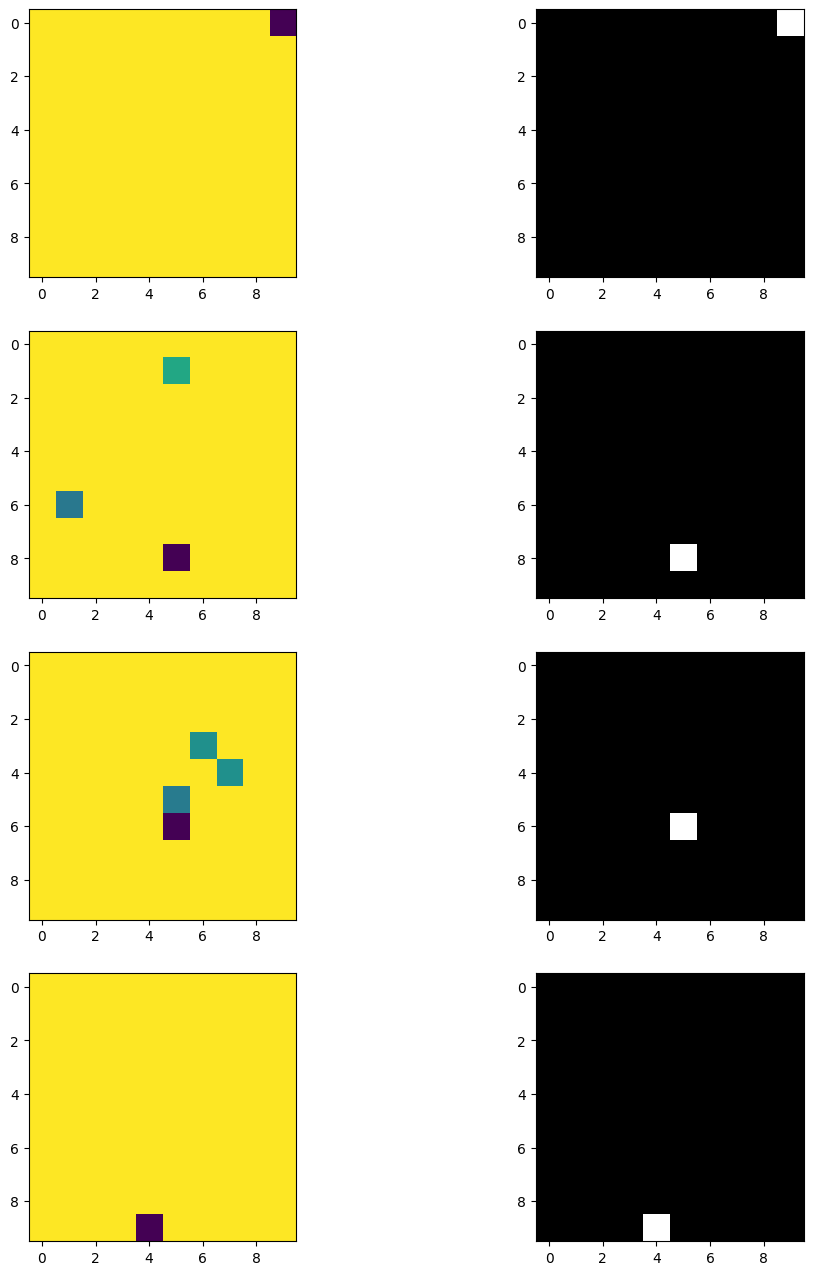

In [55]:
num_example_to_display = 4

sample_idxs = np.random.randint(0, len(data)-1, size=(num_example_to_display,))
sample_idxs = [1,32770,13,14]
#print(sample_idxs)

fig, axs = plt.subplots(nrows=num_example_to_display, ncols=2, figsize=(12,4*num_example_to_display))

for i, sample_idx in enumerate(sample_idxs):
    img = data[sample_idx][0]
    mask = data[sample_idx][1]
    axs[i][0].imshow(1-img)
    axs[i][1].imshow(mask, cmap='gray')

In [17]:
def normalize(image):
    image = tf.cast(image / tf.reduce_max(image), tf.float32)
    return image

def load_and_preprocess(img):
    img = normalize(img)
    return img

In [18]:
from keras.models import load_model

Model_logs = {"ENET": ["run-20230226_175518-8y9uyk1u"], 
             "UNETv2LITE": ["run-20230227_185529-sjhgebn1"],
              "UNETv3LITE": ["run-20230303_140554-80pvvkn4"], # model1
              "UNETv4LITE": ["run-20230308_112406-8zhdka9h"], # model2
             "HEPAENET":["run-20230227_181304-zog286i7"],
             "HEPCONVNET": ["run-20230227_184034-2315xvt8"]}

run_path = "run-20230520_154645-1mdtw3qy"

if PRETRAINED == True:
    MODEL_PATH = "/nfs_scratch/hsharma/MachineLearning/ClusterFinder/notebooks/wandb/run-20230827_095927-qiut2tr0/files/model-best.h5"
    model = load_model(MODEL_PATH)

In [19]:
data.shape

(39051, 2, 10, 10)

In [20]:
val_imgs, pred_masks, val_masks = [], [], []
for dt_point in data[:10000]:
    img_input = dt_point[0][:]
    vmask = dt_point[1][:]
    
    val_img = load_and_preprocess(img_input)
    
    val_imgs.append(img_input)
    val_masks.append(vmask)
    
    val_img = np.expand_dims(val_img, axis=0)
    pred_mask_i = model.predict(val_img)
    pred_mask_i = np.argmax(pred_mask_i, axis=-1)
    pred_mask_i = np.expand_dims(pred_mask_i, axis=-1)
    
    #switch to load, pred and display strategy for scale later
    pred_masks.extend(pred_mask_i)

1/1 [==============================] - 0s 24ms/step


In [38]:
val_imgs = np.array(val_imgs)
pred_masks = np.array(pred_masks)
val_masks = np.array(val_masks)

In [39]:
pred_masks[np.where(pred_masks == 2)] = 1

In [40]:
val_imgs.shape

In [41]:
cidx = np.sum(val_masks, axis=(1,2))!=0
val_masks[cidx].shape

In [42]:
# Prediction Visuals
num_example_to_display = 4
sample_idxs = np.random.randint(0, 10, size=(num_example_to_display,))
fig, axs = plt.subplots(nrows=num_example_to_display, ncols=3, figsize=(12,4*num_example_to_display))
#sample_idxs = [1,2,3,4]

for i, si in enumerate(sample_idxs):
    axs[i][0].imshow(val_imgs[si])
    axs[i][1].imshow(1-np.squeeze(pred_masks[si],-1), cmap='gray')
    axs[i][2].imshow(val_masks[si], cmap='gray')

In [43]:
def ccl_generator(pred):
    test_image = np.squeeze(pred).astype("uint8")
    thresh = cv2.threshold(test_image, 0, 255,
        cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    output_pred = cv2.connectedComponentsWithStats(
        thresh, 4, cv2.CV_32S)
    (numLabels_pred, labels_pred, stats_pred, centroids) = output_pred

    return labels_pred

In [44]:
fig, axs = plt.subplots(nrows=num_example_to_display, ncols=3, figsize=(12,4*num_example_to_display))

#sample_idxs = [1,2,3,4]
for i, si in enumerate(sample_idxs):
    lpred = ccl_generator(pred_masks[si])
    axs[i][0].imshow(val_imgs[si])
    axs[i][1].imshow(lpred)
    axs[i][2].imshow(val_masks[si], cmap='gray')

## Generating Test Plots

In [45]:
complete_miss_algo = []
complete_miss_pred = []
overlap= []

In [46]:
pred_miss_set = set()

In [47]:
"""for si in range(len(val_imgs)):
    energy_map = 1 - val_imgs[si][:]
    cluster_pred = ccl_generator(pred_masks[si])
    algo_pred = np.copy(val_masks[si])
    
    for cluster_label in np.unique(cluster_pred):
        # labels iter
        if cluster_label==0:
            continue

        cidx = np.where(cluster_pred==cluster_label)
        energy_pred = np.sum(energy_map[cidx])/3
        energy_algo = np.sum(algo_pred[cidx])

        # energy_algo==0: complete miss
        if energy_algo==0:
            complete_miss_algo.append(energy_pred)
        else:
            # TODO: adjust scale
            overlap.append(energy_algo-energy_pred)

        algo_pred[cidx] = 0.0

    m,n = algo_pred.shape
    for i in range(m):
        for j in range(n):
            if algo_pred[i][j]!=0:
                pred_miss_set.add(si)
                complete_miss_pred.append(algo_pred[i][j])"""

In [48]:
## Added Energy Weighted Balancing in Predictions
for si in range(len(val_imgs)):
    energy_map = val_imgs[si][:]
    cluster_pred = ccl_generator(pred_masks[si])
    algo_pred = np.copy(val_masks[si])
    
    for cluster_label in np.unique(cluster_pred):
        # labels iter
        if cluster_label==0:
            continue

        cidx = np.where(cluster_pred==cluster_label)
        energy_pred = np.sum(energy_map[cidx])
        
        # convert pred map to energy prediction map on single point
        """try:
            avg_idx = [0,0]
            if energy_pred!=0:
                avg_idx = [int(x) for x in np.sum(cidx*energy_map[cidx], axis=1)/energy_pred]
        
            if avg_idx!=[0,0]:
                val_imgs[si][cidx] = 0.0
                val_imgs[si][avg_idx] = energy_pred
        except:
            raise"""
        
        
        energy_algo = np.sum(algo_pred[cidx])
        #if energy_algo==0.0:
        #    energy_algo = np.sum(algo_pred[avg_idx])

        # energy_algo==0: complete miss
        if energy_algo==0:
            complete_miss_algo.append(energy_pred)
        else:
            # TODO: adjust scale
            overlap.append(energy_algo-energy_pred)

        algo_pred[cidx] = 0.0
        
        # add energy weighted index here to 0.0
        #if avg_idx!=[0,0]:
        #    algo_pred[avg_idx] = 0.0

    m,n = algo_pred.shape
    for i in range(m):
        for j in range(n):
            if algo_pred[i][j]!=0:
                pred_miss_set.add(si)
                complete_miss_pred.append(algo_pred[i][j])

In [49]:
pred_masks.shape, val_masks.shape

In [50]:
cidx = np.where(np.sum(val_masks, axis=(1,2))!=0)
val_masks[cidx].shape

In [51]:
num_example_to_display = 4

sample_idxs = np.random.randint(0, len(pred_masks)-1, size=(num_example_to_display,))
sample_idxs = cidx[0][:4]

fig, axs = plt.subplots(nrows=num_example_to_display, ncols=3, figsize=(12,4*num_example_to_display))

for i, sample_idx in enumerate(sample_idxs):
    img = val_imgs[sample_idx]
    pred_mask = pred_masks[sample_idx]
    val_mask = val_masks[sample_idx]
    axs[i][0].imshow(img)
    axs[i][1].imshow(1-pred_mask, cmap='gray')
    axs[i][2].imshow(val_mask, cmap='gray')

Text(0.5, 0, 'energy difference (algo vs ml)')

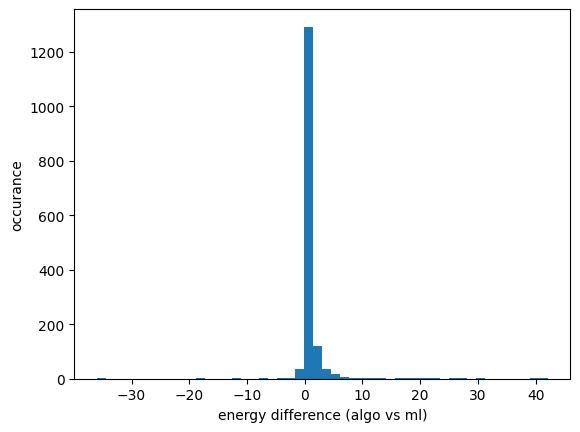

In [56]:
sub_rel = overlap
plt.hist(sub_rel, bins=50)  # density=False would make counts
plt.ylabel('occurance')
plt.xlabel('energy difference (algo vs ml)')

Text(0.5, 0, 'completely missed ml (algo energy)')

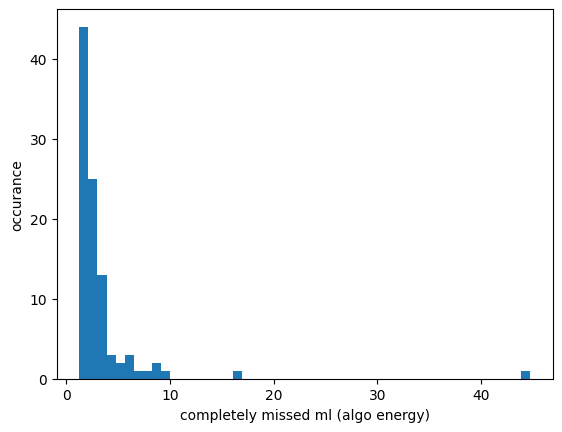

In [57]:
sub_rel = [x for x in complete_miss_pred]
plt.hist(sub_rel, bins=50)  # density=False would make counts
plt.ylabel('occurance')
plt.xlabel('completely missed ml (algo energy)')

Text(0.5, 0, 'completely missed algo (ml pred energy)')

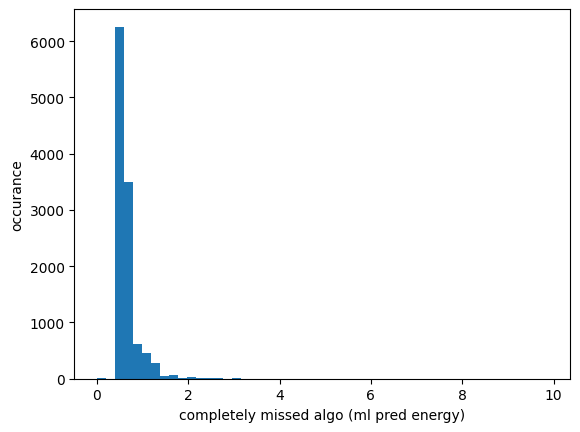

In [58]:
sub_rel = [x for x in complete_miss_algo if x < 10]
plt.hist(sub_rel, bins=50)  # density=False would make counts
plt.ylabel('occurance')
plt.xlabel('completely missed algo (ml pred energy)')